# regression (autompg dataset)_car name 사용X

## 0. 데이터 전처리

### 0.1 데이터 불러오기

In [14]:
import pandas as pd
import numpy as np 

In [15]:
data = pd.read_csv('auto-mpg.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### 0.2 데이터 전처리

#### 결측치 제거

In [17]:
data = data[data.horsepower!='?']
data = data.astype({'horsepower':'int64'})

'?'로 채워져있는 행 제거(6개)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [19]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### model year -> year 로 수정, origin 생산지 이름으로 수정

In [20]:
data = data.rename({'model year':'year'}, axis = 1)

In [21]:
data = data.rename({'origin_1':'USA', 'origin_2':'EU', 'origin_3':'JAPAN'}, axis = 1)

In [22]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### 자동차 이름 버림

In [23]:
data.drop(columns = ['car name'], axis = 1, inplace = True)

In [24]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [25]:
data.shape

(392, 8)

In [15]:
# data[['displacement','horsepower','weight','acceleration']] = StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])

## 2. Regression Tree

### 2.1 train/test 분리

In [26]:
from sklearn.model_selection import train_test_split

In [112]:
y = data['mpg']
X = data.drop(['mpg', 'displacement'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: mpg, dtype: float64

### 2.1 modeling

In [57]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [58]:
rt = dtr(max_depth = 5)
rt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 2.2 시각화

In [59]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import graphviz

In [60]:
col_names = ['cylinders', 'horsepower', 'weight', 'accerleration', 'year', 'origin']

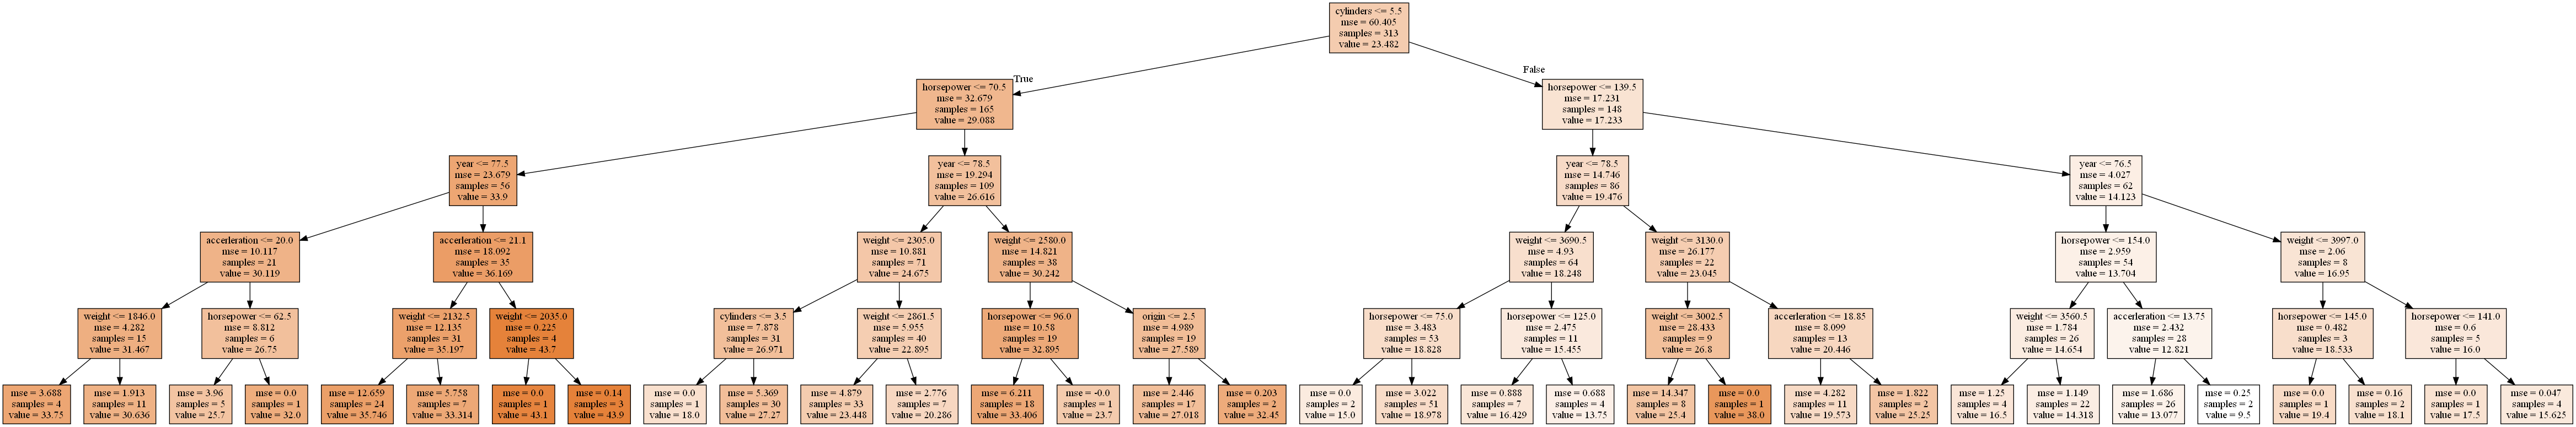

In [68]:
dot_file =StringIO()

tree.export_graphviz(rt, feature_names = col_names, out_file = dot_file, filled = True)

graph = pydotplus.graph_from_dot_data(dot_file.getvalue())

Image(graph.create_png())

### 2.3 파라미터 조정

In [63]:
# max_depth 100일때 overfitting 현상 #
reg_tree_h = dtr(max_depth=100, random_state=0)
reg_tree_h.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [64]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree_h.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_h.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.717


In [66]:
# max_depth 5일때
reg_tree_f = dtr(max_depth = 5, random_state = 0)
reg_tree_f.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [67]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree_f.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_f.score(X_test, y_test)))

훈련 세트 정확도: 0.931
테스트 세트 정확도: 0.757


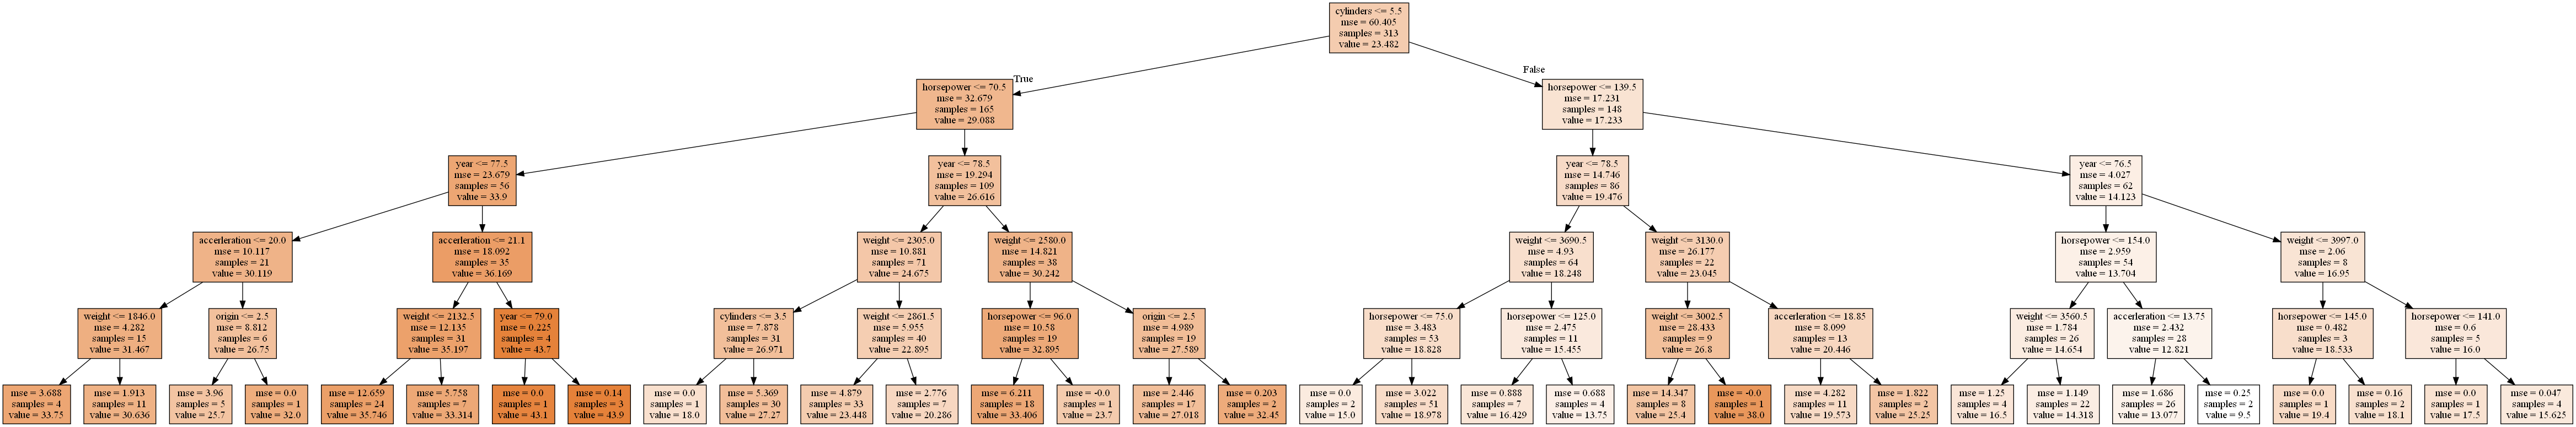

In [129]:
dot_file =StringIO()

tree.export_graphviz(reg_tree_f, feature_names=col_names[:], out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

Image(graph.create_png())

In [69]:
from sklearn.tree import DecisionTreeRegressor as dtr

# min_samples_split: 분기 시 최소한의 sample수를 충족해야 할 때 쓰임
# min_samples_leaf: 분기 후 node가 최소한의 sample수를 충족해야 할 때 쓰임

reg_tree_ad = dtr(max_depth = 5, min_samples_split = 20, min_samples_leaf = 10, random_state=0)
reg_tree_ad.fit(X_train, y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

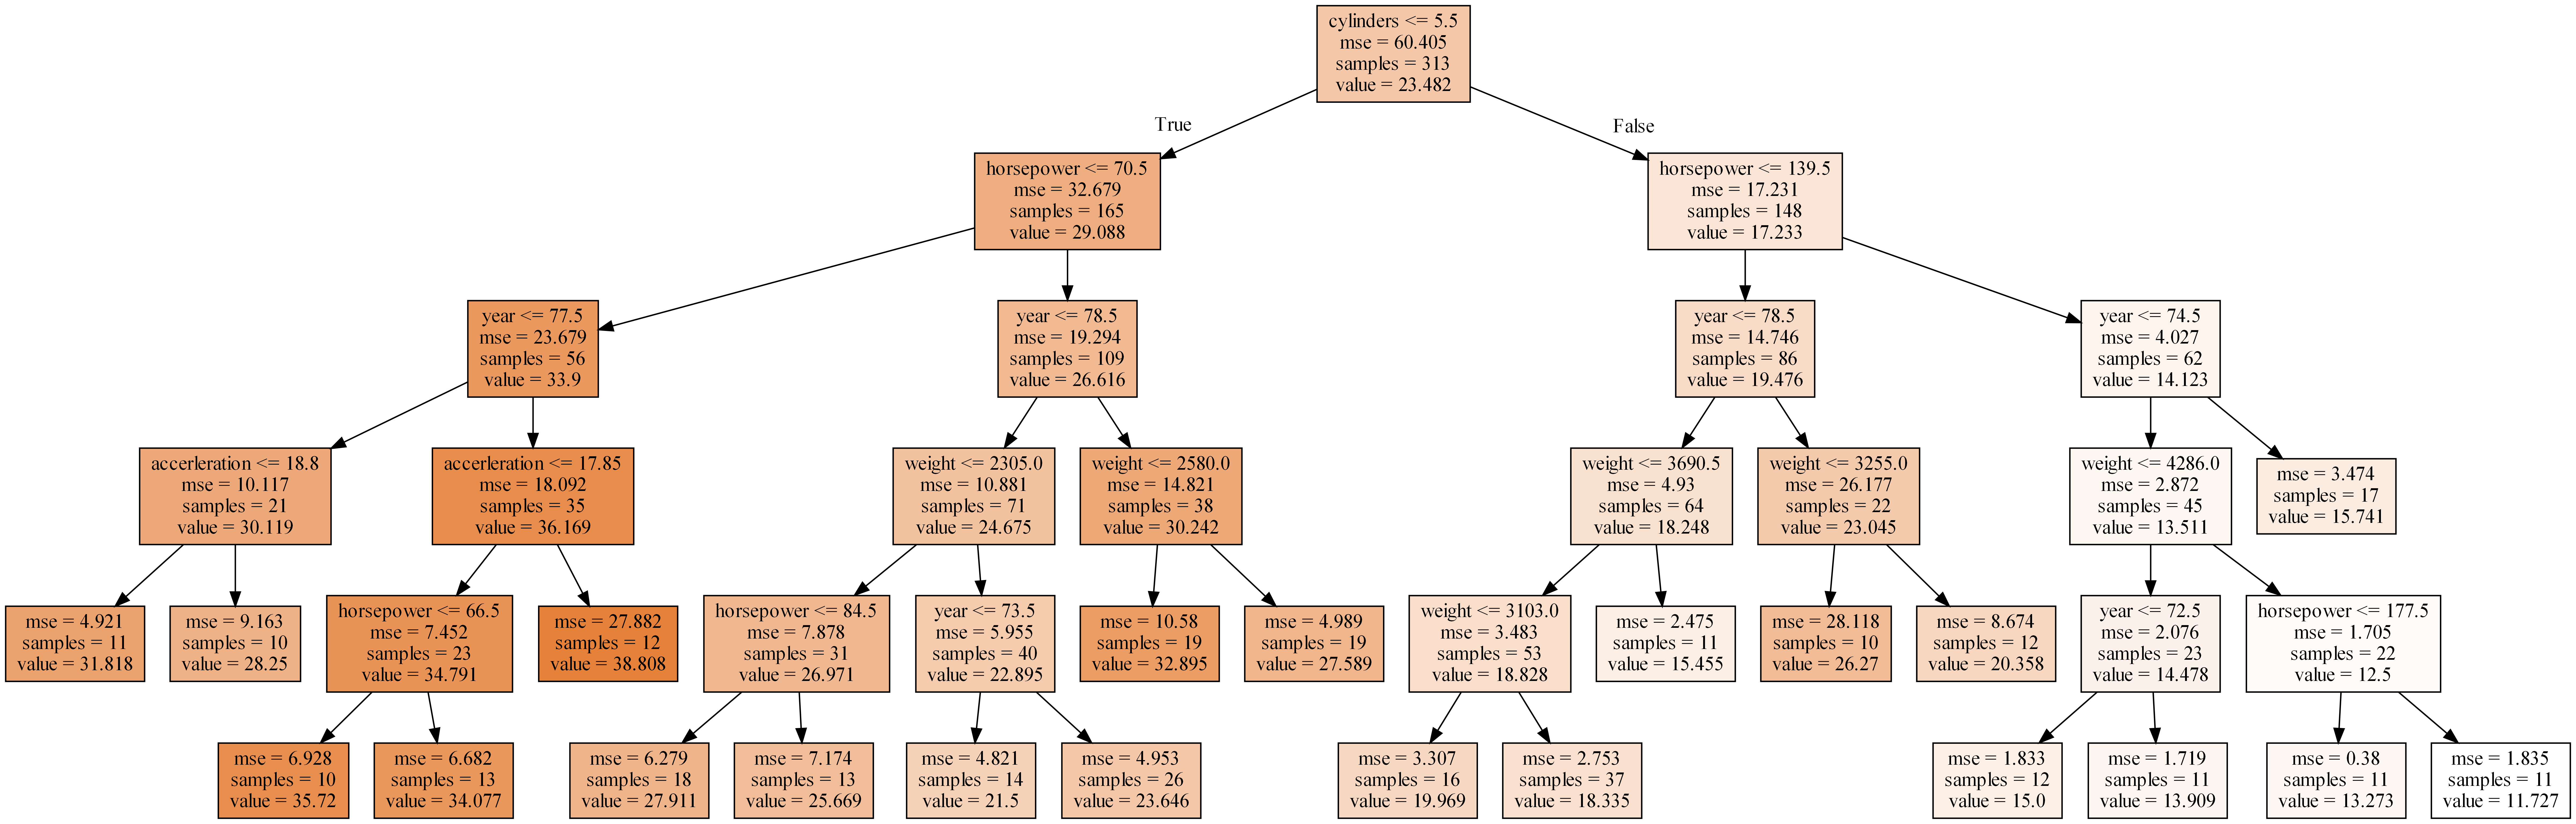

In [71]:
# max_depth와 min_samples_split, min_samples_leaf 조절했을 때 #
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_ad, feature_names=col_names[:], out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())

In [72]:
# 성능측정 -> 오히려 성능이 조정했을 때보다 떨어지게 나올 수가 있음.
print("훈련 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_test, y_test)))

훈련 세트 정확도: 0.893
테스트 세트 정확도: 0.843


In [73]:
# tree를 만드는 결정에 각 특성이 얼마나 중요한지 평가
feature_imp = reg_tree_ad.feature_importances_
feature_imp

array([0.64954789, 0.18137669, 0.05483719, 0.01148917, 0.10274906,
       0.        ])

In [74]:
X_train

,cylinders,horsepower,weight,acceleration,year,origin
220,4,70,1945,16.8,77,3
256,6,100,3430,17.2,78,1
301,4,70,2200,13.2,79,1
193,6,81,3012,17.6,76,1
57,4,95,2278,15.5,72,3
...,...,...,...,...,...,...
325,4,48,2085,21.7,80,2
194,6,90,3085,17.6,76,1
118,4,75,2158,15.5,73,2
48,6,88,3139,14.5,71,1


In [76]:
import matplotlib.pyplot as plt

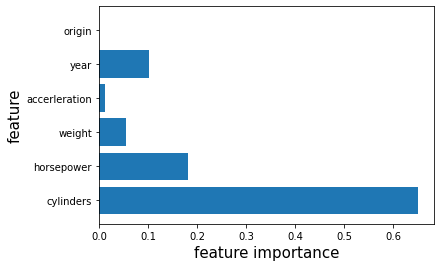

In [78]:
n_feature = X_train.shape[1]

idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align='center')

plt.yticks(idx, col_names[:])

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

## 3. Random Forest

### 3.1 modeling

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True, max_features=6,
                            criterion='mse', max_depth = 5, random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

### 3.2 feature importance

In [81]:
print(f'Random forest feature importances: {rfr.feature_importances_}')

Random forest feature importances: [0.30126066 0.14582047 0.41246721 0.02492958 0.11263733 0.00288475]


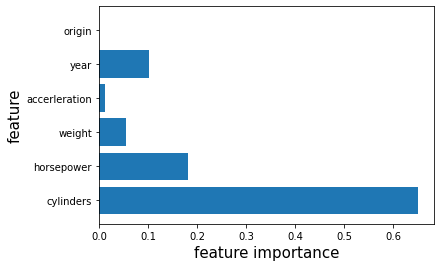

In [83]:
n_feature = X_train.shape[1]

idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align='center')

plt.yticks(idx, col_names[:])

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

### 3.2 성능 측정 & 시각화

In [84]:
# out of bag score
rfr.oob_score_

0.853361628924753

In [85]:
print(rfr.score(X_test, y_test))

0.8956269703537812


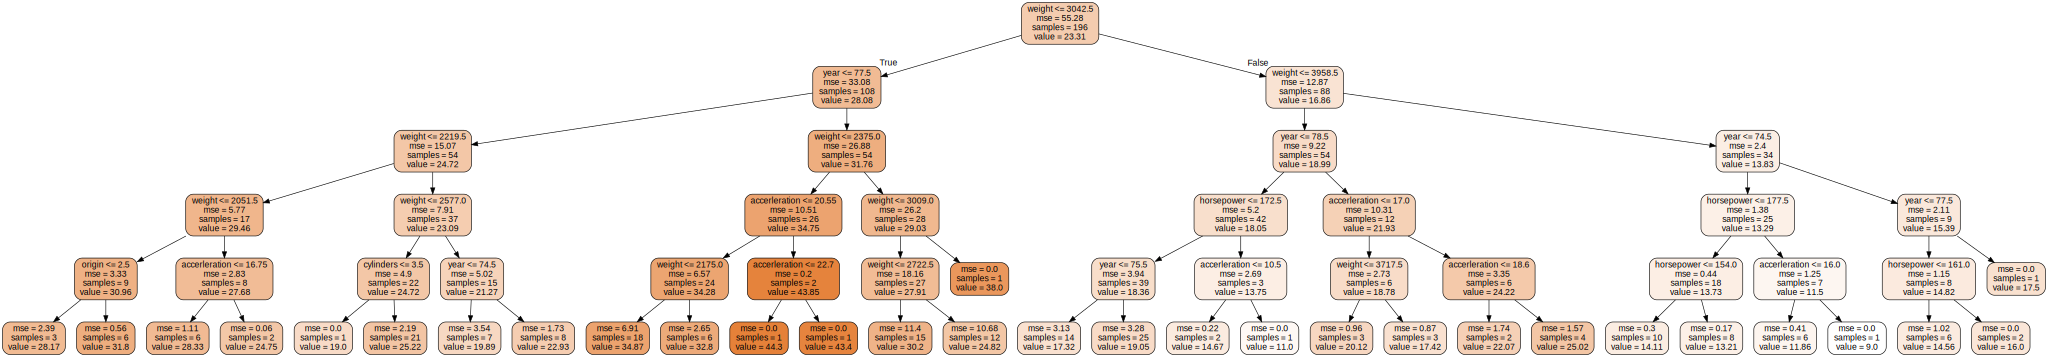

In [87]:
# randomforest 중 일부 트리 graph화
estimator = rfr.estimators_[50]

from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col_names[:],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [88]:
n_nodes = []
max_depths = []

for ind_tree in rfr.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [89]:
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 59
Average maximum depth 5


In [90]:
# RandomForestRegressor 기준 #
from sklearn import metrics

y_pred = rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8844521768443936
Mean Squared Error: 6.487338519862818
Root Mean Squared Error: 2.5470254258375236


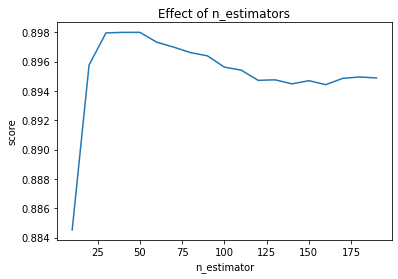

In [91]:
# random forest에 속한 decision tree별 성능변화
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rfr.set_params(n_estimators=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

## 4. Gradient Boosting

### 4.1 scaling

In [92]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

### 4.2 modeling

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

In [114]:
gbr_b = GradientBoostingRegressor(random_state=42, max_depth=5, min_samples_leaf = 2, n_estimators = 20)
gbr_b

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
gbr_b.fit(X_train, y_train)

print("Train R-squared: %.2f" %gbr_b.score(X_train, y_train) )
print("Test R-squared: %.2f" %gbr_b.score(X_test, y_test) )

Train R-squared: 0.95
Test R-squared: 0.88


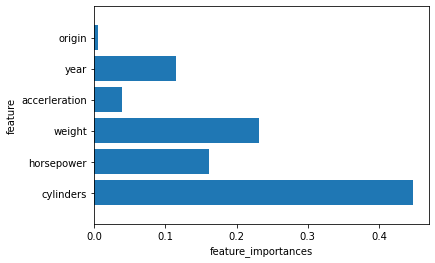

In [116]:
def plot_feature_importances(model):
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), col_names[:])
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbr_b)

### 4.3 파라미터 조정

In [117]:
from sklearn.model_selection import GridSearchCV

# n_estimators: tree 갯수, max_features: random feature 수, 
# max_depth: tree의 가지수, learning rate: train set에 overfitting 방지용

gbr = GradientBoostingRegressor(random_state=42)

param_grid = [{'n_estimators': range(1, 500, 50), 'max_features': range(1, 13),
              'max_depth': range(3, 5), 'learning_rate': np.linspace(0.1, 1, 10)}]

gsr = GridSearchCV(estimator=gbr, param_grid=param_grid,  cv=5, verbose=1, n_jobs=-1)

gsr.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 4960 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 9872 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:   44.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [118]:
# 모든 모델 중 가장 성능이 좋은 것을 뽑는 best estimator # n_estimators가 제일 높은 모델이 선정되는 것이 대부분
best_gsr_estimator = gsr.best_estimator_
best_gsr_estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=1, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=51,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
gsr.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1, 'n_estimators': 51}

In [120]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsr_estimator.n_estimators )
print("max_depth: %d" %best_gsr_estimator.max_depth )
print("Learning Rate: %.1f" %best_gsr_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsr_estimator.min_samples_leaf )
print("max_features: %.1f" %best_gsr_estimator.max_features) 
print("---------------------------" )
print("Train R-squared: %.2f" %best_gsr_estimator.score(X_train,y_train) )
print("Test R-squared: %.2f" %best_gsr_estimator.score(X_test,y_test) )

Best Estimator Parameters
---------------------------
n_estimators: 51
max_depth: 4
Learning Rate: 0.1
min_samples_leaf: 1
max_features: 1.0
---------------------------
Train R-squared: 0.96
Test R-squared: 0.89


In [121]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=4,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x212243ADE40,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=4,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x212243ADE40,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedm

In [122]:
best_gsr_estimator.feature_importances_

array([0.34038827, 0.19819998, 0.10192768, 0.06042911, 0.2077249 ,
       0.09133004])

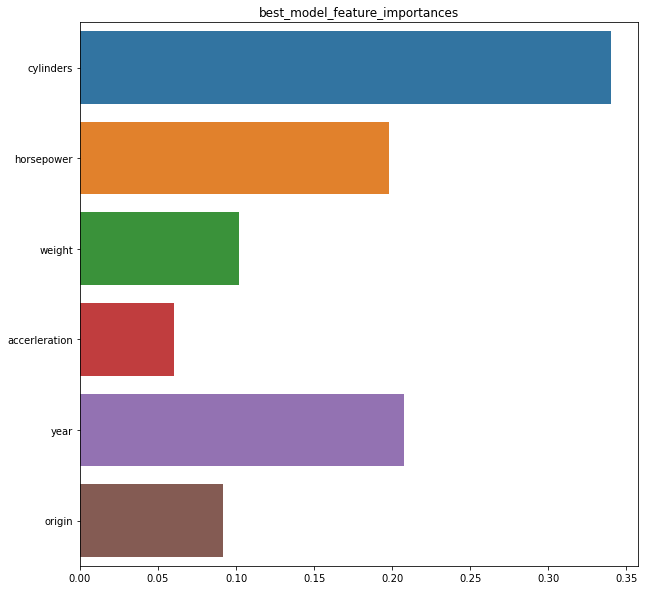

In [123]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
import seaborn as sns

ft_importances = pd.Series(best_gsr_estimator.feature_importances_, index = col_names[:])

plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
sns.barplot(x=ft_importances, y=col_names[:])
plt.show()

In [124]:
# learning_curve: Determines cross-validated training and test scores for different training set sizes.
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure() 
    plt.title(title) 
    if ylim is not None: 
        plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 
        
    return plt 

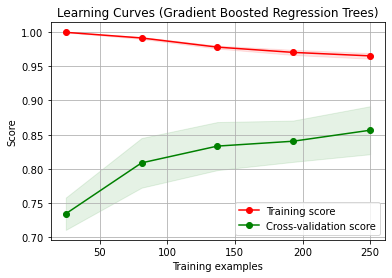

In [125]:
# train data의 size가 커지면 커질수록 train srcore와 valid score의 격차가 줄어듦 #
title = "Learning Curves (Gradient Boosted Regression Trees)"
estimator = GradientBoostingRegressor(n_estimators=best_gsr_estimator.n_estimators, 
                                      max_depth=best_gsr_estimator.max_depth, 
                                      learning_rate=best_gsr_estimator.learning_rate, 
                                      min_samples_leaf=best_gsr_estimator.min_samples_leaf, 
                                      max_features=best_gsr_estimator.max_features) 
# estimator: bset estimator
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1) 
plt.show()

In [126]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=4,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x212243ADE40,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=4,
                      max_features=1, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x212243ADE40,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedm

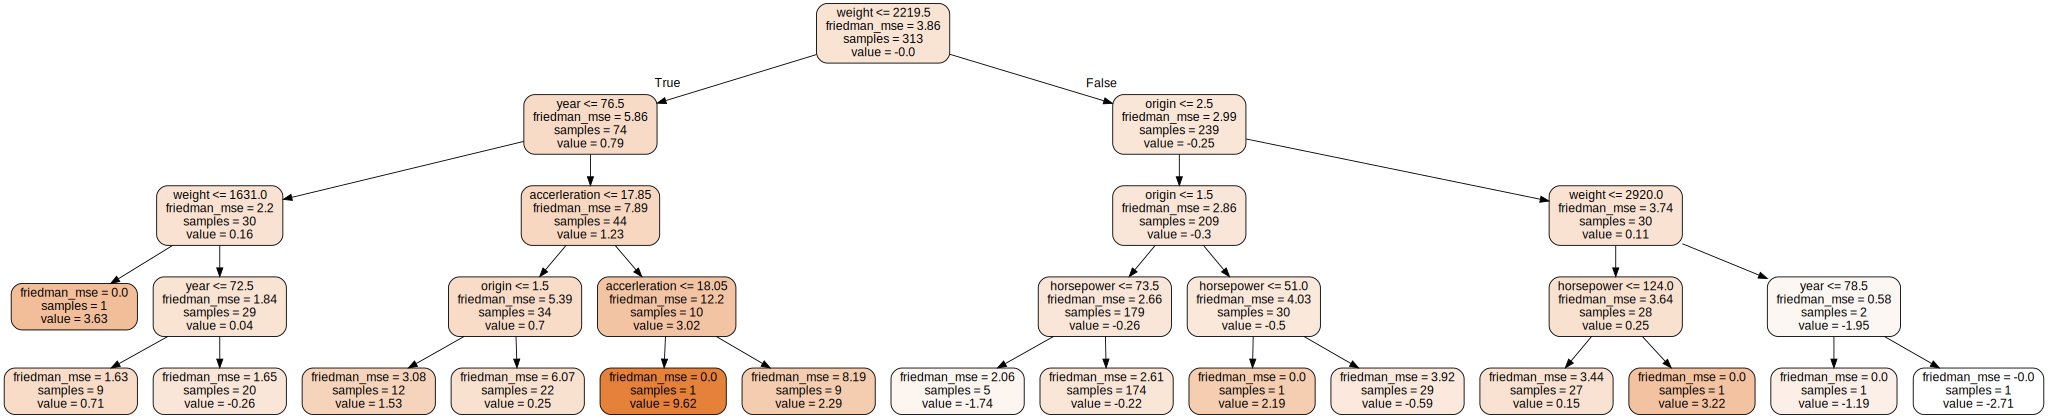

In [127]:
# best gradient boosting 중 일부 트리 graph화 # value: 잔차
estimator = best_gsr_estimator.estimators_[30][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col_names[:],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph